## Translation Noises

In [1]:
# The noises from --> Training Dataset's predictions in Step1's Model

import Functions.MyDataset as MyDataset

MyDataset.get_pat_from_idx(301, True)

('DM', 1)

In [2]:
import numpy as np

Y_pred_dir = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection/Spartan/trained_models/divided_dataset/straight_model/mean_two_landmarks/"

Y_eva_pred_file = "bestVal_straight_model_divided_176_88_48_mean_two_landmarks_all_p.npy"
Y_eva_gt_file = "straight_model_divided_176_88_48_mean_two_landmarks_all_gt.npy"
Y_eva_err_dis_file = "bestVal_straight_model_divided_176_88_48_mean_two_landmarks_all_err_dis.npy"

Y_eva_pred_path = Y_pred_dir + Y_eva_pred_file
Y_eva_pred = np.load(Y_eva_pred_path)

Y_eva_gt_path = Y_pred_dir + Y_eva_gt_file
Y_eva_gt_read = np.load(Y_eva_gt_path)

Y_eva_err_dis_path = Y_pred_dir + Y_eva_err_dis_file
Y_eva_err_dis = np.load(Y_eva_err_dis_path)

In [3]:
data_splits = MyDataset.get_data_splits(True, True)

Y_eva_err_dis_train = Y_eva_err_dis[data_splits[0]]
Y_eva_err_dis_val = Y_eva_err_dis[data_splits[1]]
Y_eva_err_dis_test = Y_eva_err_dis[data_splits[2]]

In [4]:
print(Y_eva_err_dis_val)

[[[-1.67248517e-01 -1.52246088e-01 -6.84525907e-01]]

 [[ 2.29901209e-01 -9.64470196e+00  3.71760035e+00]]

 [[-3.37919617e+00  2.90193439e+00  4.46545124e-01]]

 [[ 2.24358726e+00 -7.47663915e-01 -2.87058890e-01]]

 [[-9.77978230e-01 -2.59512514e-01  4.72910434e-01]]

 [[ 1.32068861e+00  3.61212790e-01 -1.48934889e+00]]

 [[-8.18213403e-01  1.02380383e+00 -2.86571264e-01]]

 [[ 2.19893050e+00  5.45873158e-02 -5.16794682e-01]]

 [[ 8.12610984e-02  3.69658262e-01 -7.67876878e-02]]

 [[ 2.04696441e+00  2.22663924e-01 -4.30187315e-01]]

 [[-5.67276812e+00  5.17895555e+00  8.54566693e-01]]

 [[ 2.04791331e+00 -6.79705501e-01 -9.82636213e-01]]

 [[-3.07388157e-01  1.55467987e-01  3.79875183e-01]]

 [[ 1.78036547e+00  2.59559155e-01 -1.76684618e-01]]

 [[-9.93011534e-01  1.20408499e+00  7.52390325e-01]]

 [[ 2.57263422e+00 -4.18860286e-01 -8.48219451e-03]]

 [[-4.01968384e+00  3.27421021e+00  7.27761090e-01]]

 [[ 2.29196692e+00 -6.38134181e-01 -5.02302468e-01]]

 [[-2.63166040e-01  7.789974

In [8]:
square_err_diff = np.power(Y_eva_err_dis_val, 2)
sum_square_err_diff = np.sum(square_err_diff, axis= (1,2) )

min_err_idx = np.argmin(sum_square_err_diff, axis=0)
max_err_idx = np.argmax(sum_square_err_diff, axis=0)
print(f"Min[{min_err_idx}]: {sum_square_err_diff[min_err_idx]}")
print(f"Max[{max_err_idx}]: {sum_square_err_diff[max_err_idx]}")
print(f"Mean: {np.mean(sum_square_err_diff)}")

Min[94]: 0.10620573908090591
Max[1]: 106.89368438720703
Mean: 6.087070465087891


## find a distribution for noises

In [10]:
## Test dataset noises Distribution
## Skew Normal Distribution

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

a, loc, scale = 1.3, -0.1, 2.2
sample = stats.skewnorm(a, loc, scale).rvs(1000)

In [18]:
a_x, loc_x, scale_x = stats.skewnorm.fit(Y_eva_err_dis_test[:, 0, 0])

a_y, loc_y, scale_y = stats.skewnorm.fit(Y_eva_err_dis_test[:, 0, 1])

a_z, loc_z, scale_z = stats.skewnorm.fit(Y_eva_err_dis_test[:, 0, 2])

In [19]:
print("a_x: ", a_x)
print("loc_x: ", loc_x)
print("scale-x: ", scale_x)

print("a_y: ", a_y)
print("loc_y: ", loc_y)
print("scale-y: ", scale_y)

print("a_z: ", a_z)
print("loc_z: ", loc_z)
print("scale-z: ", scale_z)

a_x:  -4.392549919719913
loc_x:  1.12173099804582
scale-x:  1.669288486529343
a_y:  0.015393324657128355
loc_y:  -0.30127937456135756
scale-y:  0.5753345369617957
a_z:  4.9089566058258365
loc_z:  -1.2210311142370425
scale-z:  0.986150145976759


In [37]:
sn_x = stats.skewnorm(a_x, loc_x, scale_x)
x = np.linspace(sn_x.ppf(0.01), sn_x.ppf(0.99), 400)

sn_y = stats.skewnorm(a_y, loc_y, scale_y)
y = np.linspace(sn_y.ppf(0.01), sn_y.ppf(0.99), 400)

sn_z = stats.skewnorm(a_z, loc_z, scale_z)
z = np.linspace(sn_z.ppf(0.01), sn_z.ppf(0.99), 400)

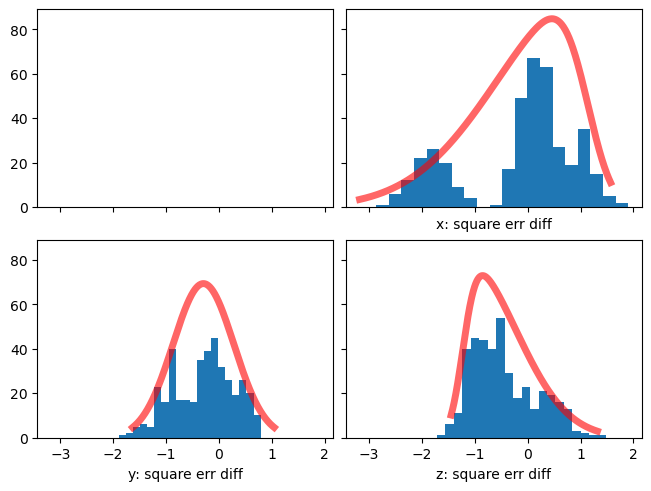

In [40]:
from matplotlib import pyplot

fig, axs = pyplot.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True)

# axs[0][0].hist(sum_square_err_diff, 20)
# axs[0][0].set_xlabel("sum square err diff")

axs[0][1].hist(Y_eva_err_dis_test[:, 0, 0], 20)
axs[0][1].set_xlabel("x: square err diff")
axs[0][1].plot(x, sn_x.pdf(x)*200, 'r-', lw=5, alpha=0.6)

axs[1][0].hist(Y_eva_err_dis_test[:, 0, 1], 20)
axs[1][0].set_xlabel("y: square err diff")
axs[1][0].plot(y, sn_y.pdf(y)*100, 'r-', lw=5, alpha=0.6)

axs[1][1].hist(Y_eva_err_dis_test[:, 0, 2], 20)
axs[1][1].set_xlabel("z: square err diff")
axs[1][1].plot(z, sn_z.pdf(z)*100, 'r-', lw=5, alpha=0.6)

pyplot.show()


In [46]:
s1_pred_test_dis_array = np.zeros((2000, 1, 3))
s1_pred_test_dis_array[:, 0, 0] = sn_x.rvs(size=2000)
s1_pred_test_dis_array[:, 0, 1] = sn_y.rvs(size=2000)
s1_pred_test_dis_array[:, 0, 2] = sn_z.rvs(size=2000)

In [47]:
file_name = "noises_s1_pred_test_dis"
np.save(f"../Spartan/res/{file_name}", s1_pred_test_dis_array)